# ML aka Machine Learning

# SUMARY

Teknik dimana komputer dapat mengekstraksi atau mempelajari pola dari suatu data, kemudian dengan pola yang telah dipelajari dari data historis, komputer mampu mengenali dan memprediksi trend, hasil atau kejadian di masa mendatang atau dari observasi baru tanpa perlu diprogram secara eksplisit

Split Dataset : TRAINING DATASET digunakan untuk membuat/melatih model machine learning, sedangkan TEST DATASET digunakan untuk menguji performa/akurasi dari model yang telah dilatih/di-training.

Teknik atau pendekatan yang digunakan untuk membangun model disebut ALGORITHM seperti Decision Tree, K-NN, Linear Regression, Random Forest, dsb. dan output atau hasil dari proses melatih algorithm dengan suatu dataset disebut MODEL.

Hal yang menjadi target prediksi atau hal yang akan diprediksi dalam machine learning disebut LABEL/CLASS/TARGET. Dalam statistika/matematika, LABEL/CLASS/TARGET ini dinamakan dengan Dependent Variabel, dan FEATURE adalah Independent Variabel.

In [8]:
import pandas as pd
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/online_raw.csv')
print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         

In [9]:
dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())
# Tugas praktek
print('\nKorelasi BounceRates-ExitRates: ', dataset_corr.loc['BounceRates', 'ExitRates'])
print('\nKorelasi Revenue-PageValues: ', dataset_corr.loc['Revenue', 'PageValues'])
print('\nKorelasi TrafficType-Weekend: ', dataset_corr.loc['TrafficType', 'Weekend'])

Korelasi dataset:
                          Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601466   
Administrative_Duration        0.601466                 1.000000   
Informational                  0.376782                 0.302647   
Informational_Duration         0.255757                 0.237959   
ProductRelated                 0.430832                 0.288869   
ProductRelated_Duration        0.373647                 0.355238   
BounceRates                   -0.223474                -0.144128   
ExitRates                     -0.316192                -0.205618   
PageValues                     0.098771                 0.067463   
SpecialDay                    -0.095054                -0.073472   
OperatingSystems              -0.006459                -0.007425   
Browser                       -0.025243                -0.015525   
Region                        -0.005680                -0.005681   
TrafficType                  

Melihat korelasi pada dataset, menggali tentang hubungan atau korelasi dari setiap feature, karena beberapa algorithm seperti linear regression dan logistic regression akan menghasilkan model dengan performansi yang buruk jika kita menggunakan feature/variabel saling dependensi atau berkorelasi kuat (multicollinearity).

*)Tidak ada nilai korelasi untuk Feature VisitorType dan Month.

*)Feature yang memiliki korelasi yang paling kuat dengan Revenue adalah PageValues.

*)ExitRates dan BounceRates memiliki korelasi yang sangat kuat dengan nilai korelasi 0.91.

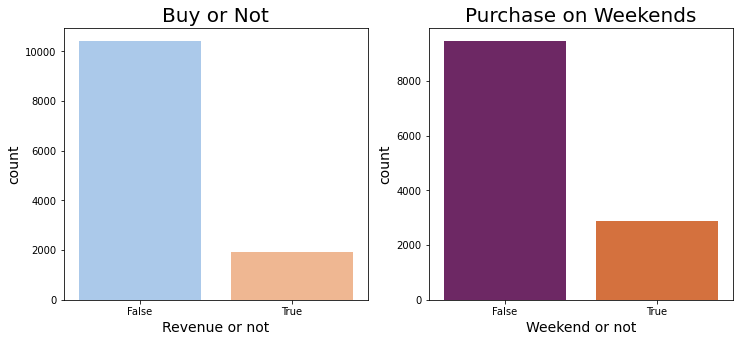

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5) 
plt.subplot(1, 2, 1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()

*) Menampilkan perbandingan jumlah yang membeli (1) dan tidak membeli (0), serta perbandingan jumlah pembelian saat weekend

next, visualisasi berupa histogram yang menggambarkan jumlah customer untuk setiap Region.

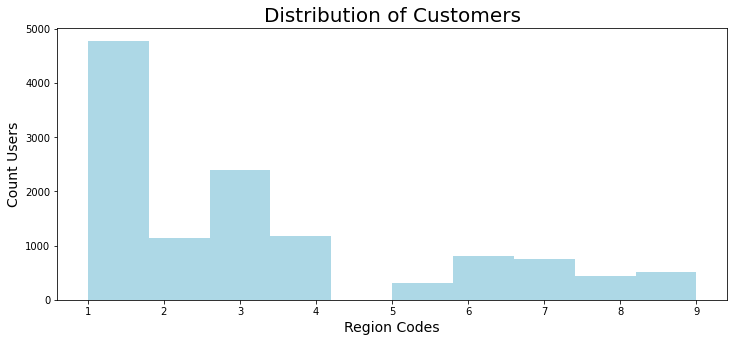

In [12]:
import matplotlib.pyplot as plt
# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers', fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

# Data Preprocessing

In [13]:
#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isnull().sum().sum())

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112


*)menghapus missing value

In [14]:
#Drop rows with missing value   
dataset_clean = dataset.dropna()  
print('Ukuran dataset_clean:', dataset_clean.shape)

Ukuran dataset_clean: (12316, 18)


dapat juga menggunakan metode impute missing value, yaitu mengisi record yang hilang ini dengan suatu nilai. Ada berbagai teknik dalam metode imputing, mulai dari yang paling sederhana yaitu mengisi missing value dengan nilai mean, median, modus, atau nilai konstan, sampai teknik paling advance yaitu dengan menggunakan nilai yang diestimasi oleh suatu predictive model.

In [15]:
#imputing mssing value with mean or median
print("Before imputation:")
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

# Preprocessing-Scaling

Beberapa machine learning seperti K-NN dan gradient descent mengharuskan semua variabel memiliki rentang nilai yang sama, karena jika tidak sama, feature dengan rentang nilai terbesar misalnya ProductRelated_Duration otomatis akan menjadi feature yang paling mendominasi dalam proses training/komputasi, sehingga model yang dihasilkan pun akan sangat bias. Oleh karena itu, sebelum memulai training model, kita terlebih dahulu perlu melakukan data rescaling ke dalam rentang 0 dan 1, sehingga semua feature berada dalam rentang nilai tersebut, yaitu nilai max = 1 dan nilai min = 0. Data rescaling ini dengan mudah dapat dilakukan di Python menggunakan .MinMaxScaler( ) dari Scikit-Learn library

In [16]:
from sklearn.preprocessing import MinMaxScaler  
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


# Preprocessing-convert string to numeric

In [17]:
#menggunakan LabelEncoder dari sklearn.preprocessing
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


# Features & Label

untuk melatih dataset menggunakan Scikit-Learn library, dataset perlu dipisahkan ke dalam Features dan Label/Target. Variabel Feature akan terdiri dari variabel yang dideklarasikan sebagai X dan [Revenue] adalah variabel Target yang dideklarasikan sebagai y. Gunakan fungsi drop() untuk menghapus kolom [Revenue] dari dataset

In [18]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis = 1)
# assigning the target column Revenue to y
y = dataset['Revenue']
# checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


# Train & Test Dataset

dataset perlu kita bagi ke dalam training dataset dan test dataset dengan perbandingan 80:20. 80% digunakan untuk training dan 20% untuk proses testing, Perbandingan lain yang biasanya digunakan adalah 75:25. 

Fungsi Train adalah melatih model untuk mengenali pola dalam data, sedangkan testing berfungsi untuk memastikan bahwa model yang telah dilatih tersebut mampu dengan baik memprediksi label dari new observation dan belum dipelajari oleh model sebelumnya.

In [19]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)


#TRAIN MODEL : Fit DecionTree

In [20]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train, y_train)

#TRAIN MODEL : Predict

Setelah model/classifier terbentuk, selanjutnya kita menggunakan model ini untuk memprediksi LABEL dari testing dataset (X_test), menggunakan fungsi .predict(). Fungsi ini akan mengembalikan hasil prediksi untuk setiap data point dari X_test dalam bentuk array.

In [21]:
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(2466,)


# EVALUASI MODEL PERFORMANCE

Untuk evaluasi model performance, setiap algorithm mempunyai metrik yang berbeda-beda. Sekarang saya akan menjelaskan sedikit metrik apa saja yang umumnya digunakan. Metrik paling sederhana untuk mengecek performansi model adalah accuracy.

bisa munculkan dengan fungsi .score( ). Tetapi, di banyak real problem, accuracy saja tidaklah cukup. Metode lain yang digunakan adalah dengan Confusion Matrix. Confusion Matrix merepresentasikan perbandingan prediksi dan real LABEL dari test dataset yang dihasilkan oleh algoritma ML

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8637469586374696

Confusion matrix:
[[1892  152]
 [ 184  238]]

Classification report:
              precision    recall  f1-score   support

       False       0.91      0.93      0.92      2044
        True       0.61      0.56      0.59       422

    accuracy                           0.86      2466
   macro avg       0.76      0.74      0.75      2466
weighted avg       0.86      0.86      0.86      2466



*) Berdasarkan confusion matrix, dapat mengukur metrik - metrik berikut :

Accuracy = (TP + TN ) / (TP+FP+FN+TN)

Precision = (TP) / (TP+FP)

Recall = (TP) / (TP + FN)

F1 Score = 2 * (Recall*Precission) / (Recall + Precission)
 

Tidak perlu menghitung nilai ini secara manual. Cukup gunakan  fungsi classification_report() untuk memunculkan hasil perhitungan metrik - metrik tersebut.

*) Jika dataset memiliki jumlah data False Negatif dan False Positif yang seimbang (Symmetric), maka bisa gunakan Accuracy, tetapi jika tidak seimbang, maka sebaiknya menggunakan F1-Score.

Dalam suatu problem, jika lebih memilih False Positif lebih baik terjadi daripada False Negatif, misalnya: Dalam kasus Fraud/Scam, kecenderungan model mendeteksi transaksi sebagai fraud walaupun kenyataannya bukan, dianggap lebih baik, daripada transaksi tersebut tidak terdeteksi sebagai fraud tetapi ternyata fraud. Untuk problem ini sebaiknya menggunakan Recall.

Sebaliknya, jika lebih menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif, sebaiknya menggunakan Precision.

Contohnya adalah pada kasus klasifikasi email SPAM atau tidak. Banyak orang lebih memilih jika email yang sebenarnya SPAM namun diprediksi tidak SPAM (sehingga tetap ada pada kotak masuk email kita), daripada email yang sebenarnya bukan SPAM tapi diprediksi SPAM (sehingga tidak ada pada kotak masuk email).

# Classification - LogisticRegression


Logistic Regression merupakan salah satu algoritma klasifikasi dasar yang cukup popular. Secara sederhana, Logistic regression hampir serupa dengan linear regression tetapi linear regression digunakan untuk Label atau Target Variable yang berupa numerik atau continuous value, sedangkan Logistic regression digunakan untuk Label atau Target yang berupa categorical/discrete value.

Contoh continuous value adalah harga rumah, harga saham, suhu, dsb; dan contoh dari categorical value adalah prediksi SPAM or NOT SPAM (1 dan 0) atau prediksi customer SUBSCRIBE atau UNSUBSCRIBED (1 dan 0).

Logistic regression adalah salah satu linear classifier

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train, y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', model.score(X_train, y_train))  
print('Testing Accuracy :', model.score(X_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8637469586374696

Confusion matrix
[[2009   35]
 [ 318  104]]

Classification report
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      2044
        True       0.75      0.25      0.37       422

    accuracy                           0.86      2466
   macro avg       0.81      0.61      0.65      2466
weighted avg       0.84      0.86      0.83      2466



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Classification - DecisionTree

Decision Tree merupakan salah satu metode klasifikasi yang populer dan banyak diimplementasikan serta mudah diinterpretasi. Decision tree adalah model prediksi dengan struktur pohon atau struktur berhierarki. Decision Tree dapat digunakan untuk classification problem dan regression problem

Ex ; Misalnya ingin memprediksi apakah seseorang yang mengajukan aplikasi kredit/pinjaman, layak untuk mendapat pinjaman tersebut atau tidak. Dengan menggunakan decision tree, dapat membreak-down kriteria-kriteria pengajuan pinjaman ke dalam hierarki

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train, y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X_train, y_train))
print('Testing Accuracy :', decision_tree.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8580697485806975


# Regression - LinearRegression

Model regresi terdiri atas 2 tipe yaitu :

Simple regression model → model regresi paling sederhana, hanya terdiri dari satu feature (univariate) dan 1 target.

Multiple regression model → sesuai namanya, terdiri dari lebih dari satu feature (multivariate).

Linear regression digunakan untuk menganalisis hubungan linear antara dependent variabel (feature) dan independent variabel (label). Hubungan linear disini berarti bahwa jika nilai dari independen variabel mengalami perubahan baik itu naik atau turun, maka nilai dari dependen variabel juga mengalami perubahan (naik atau turun)

In [33]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/housing_boston.csv')
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing)
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

##import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


Mean squared error of testing set: 0.010913024655841009
Mean absolute error of testing set: 0.07789896103120691
Root Mean Squared Error of testing set: 0.1044654232549747


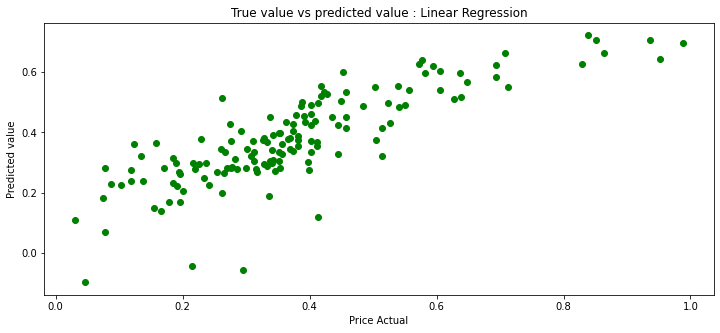

In [34]:
#Evaluation model Regressi
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

# Unsupervised

teknik machine learning dimana tidak terdapat label atau output yang digunakan untuk melatih model. Jadi, model dengan sendirinya akan bekerja untuk menemukan pola atau informasi dari dataset yang ada. Metode unsupervised learning yang dikenal dengan clustering. Sesuai dengan namanya, Clustering memproses data dan mengelompokkannya atau mengcluster objek/sample berdasarkan kesamaan antar objek/sampel dalam satu kluster, dan objek/sample ini cukup berbeda dengan objek/sample di kluster yang lain.

K-Means merupakan tipe clustering dengan centroid based (titik pusat). Artinya kesamaan dari objek/sampel dihitung dari seberapa dekat objek itu dengan centroid atau titik pusat

Untuk menentukan centroid, pada awalnya kita perlu mendefinisikan jumlah centroid (K) yang diinginkan, semisalnya kita menetapkan jumlah K = 3; maka pada awal iterasi, algorithm akan secara random menentukan 3 centroid. Setelah itu, objek/sample/data point yang lain akan dikelompokkan sebagai anggota dari salah satu centroid yang terdekat, sehingga terbentuk 3 cluster data.

Tetapi dalam unsupervised learning, kita tidak membagi dataset ke feature dan label; dan juga ke dalam training dan test dataset, karena pada dasarnya kita tidak memiliki informasi mengenai label/target data

In [2]:
#import library
import pandas as pd  
from sklearn.cluster import KMeans

#load dataset
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/mall_customers.csv')

#selecting features  
X = dataset[['annual_income','spending_score']]  

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

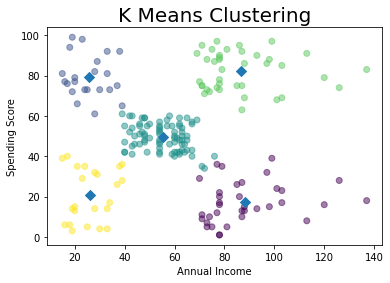

In [3]:
#import library
import matplotlib.pyplot as plt

#convert dataframe to array
X = X.values
#Separate X to xs and ys --> use for chart axis
xs = X[:,0]
ys = X[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = cluster_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

*) fungsi .values untuk mengubah tipe ‘X’ dari dataframe menjadi array

Clustering yang baik adalah cluster yang data point-nya saling rapat/sangat berdekatan satu sama lain dan cukup berjauhan dengan objek/data point di cluster yang lain. Jadi, objek dalam satu cluster tidak tersebut berjauhan. Nah, untuk mengukur kualitas dari clustering, kita bisa menggunakan inertia

Inertia sendiri mengukur seberapa besar penyebaran object/data point data dalam satu cluster, semakin kecil nilai inertia maka semakin baik.

cukup dengan print fungsi .inertia_

clustering dikatakan baik jika memiliki inertia yang kecil tetapi secara praktikal in real life, terlalu banyak cluster juga tidak diinginkan. Adapun rule untuk memilih jumlah cluster yang optimal adalah dengan memilih jumlah cluster yang terletak pada “elbow” dalam intertia plot, yaitu ketika nilai inertia mulai menurun secara perlahan

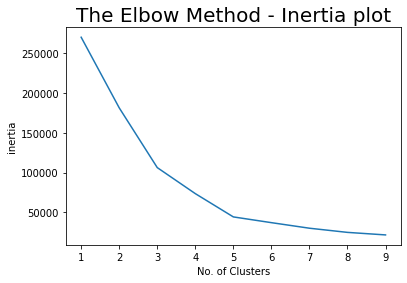

In [4]:
#import library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
    
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('inertia')
plt.show()

# Promos for our e-commerce division

In [6]:
#EDA
#import library 
import pandas as pd

# Baca data 'ecommerce_banner_promo.csv'
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/ecommerce_banner_promo.csv')

#1. Data eksplorasi dengan head(), info(), describe(), shape
print("\n[1] Data eksplorasi dengan head(), info(), describe(), shape")
print("Lima data teratas:")
print(data.head())
print("Informasi dataset:")
print(data.info())
print("Statistik deskriptif dataset:")
print(data.describe())
print("Ukuran dataset:")
print(data.shape)


[1] Data eksplorasi dengan head(), info(), describe(), shape
Lima data teratas:
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

         Timestamp  Cli

In [17]:
#cek korelasi dari setiap feature
#2. Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
print("\n[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()")
print(data.corr())

#3. Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
print("\n[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()")
print(data.groupby('Clicked on Ad').size())


[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.337496  0.001322      -0.476255  
Daily Internet Usage                  1.000000  0.028012      -0.

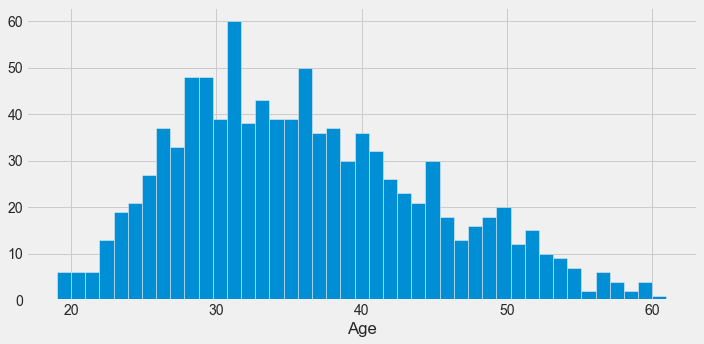

<Figure size 432x288 with 0 Axes>

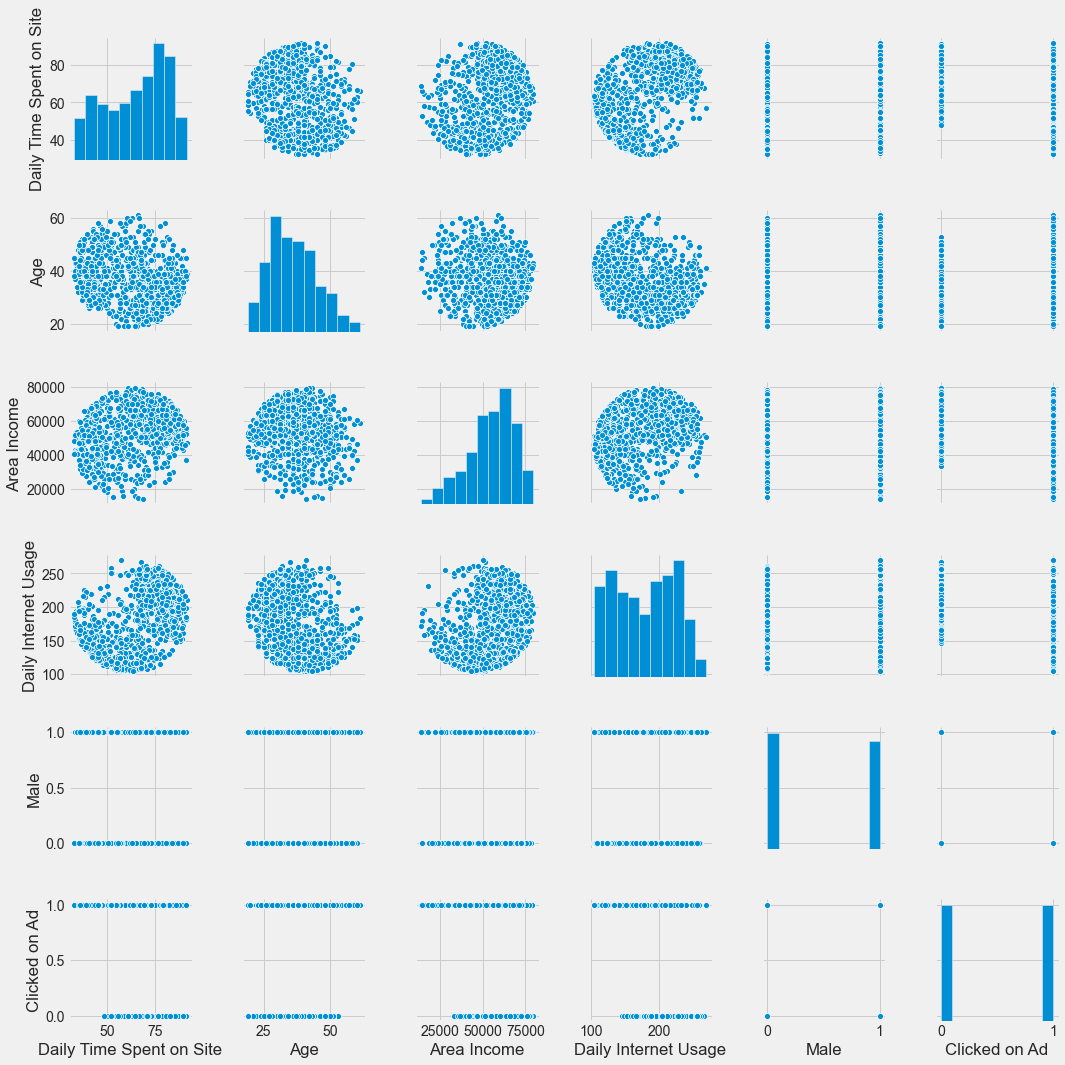

In [28]:
#EDA dgn Visualisasi
#import library
import matplotlib.pyplot as plt
import seaborn as sns

# Seting: matplotlib and seaborn
sns.set_style('whitegrid')  
plt.style.use('fivethirtyeight')

#4. Data eksplorasi dengan visualisasi
#4a. Visualisasi Jumlah user dibagi ke dalam rentang usia (Age) menggunakan histogram (hist()) plot
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins = data.Age.nunique())
plt.xlabel('Age')
plt.tight_layout()
plt.show()

#4b. Gunakan pairplot() dari seaborn (sns) modul untuk menggambarkan hubungan setiap feature.
plt.figure()
sns.pairplot(data, hue = None)
plt.show()

*) nunique() adalah fungsi untuk menghitung jumlah data untuk setiap usia (Age).

In [30]:
#5. Cek missing value
print("\n[5] Cek missing value")
print(data.isnull().sum().sum())


[5] Cek missing value
0


In [35]:
#pemodelan dgn logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#6.Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
print("\n[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing")
#6a.Drop Non-Numerical (object type) feature from X, as Logistic Regression can only take numbers, and also drop Target/label, assign Target Variable to y.   
X = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

#6b. splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#6c. Modelling
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg = logreg.fit(X_train, y_train)
# Prediksi model
y_pred = logreg.predict(X_test)

#6d. Evaluasi Model Performance
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))


[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
Evaluasi Model Performance:
Training Accuracy : 0.9
Testing Accuracy : 0.9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
#liat performa model
from sklearn.metrics import confusion_matrix, classification_report

#7. Print Confusion matrix dan classification report
print("\n[7] Print Confusion matrix dan classification report")

#apply confusion_matrix function to y_test and y_pred
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

#apply classification_report function to y_test and y_pred
print("Classification report:")
cr = classification_report(y_test, y_pred)
print(cr)


[7] Print Confusion matrix dan classification report
Confusion matrix:
[[86  3]
 [17 94]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90        89
           1       0.97      0.85      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



*) Model sudah sangat baik dalam memprediksi user yang akan mengklik website atau tidak, dapat dilihat dari nilai accuracy = 0.90; Dataset memiliki jumlah label yang seimbang (balance class), sehingga evaluasi performansi dapat menggunakan metrik Accuracy.